In [31]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [32]:
e = 1.602 * (1e-19)
er = 1.057
k = 1.380649 * (1e-23)
e0 = 8.854187817 * (1e-12)
c = 1.1061

m = 9.11 * (1e-34)
ab = 5.291772109 * (1e-11)
hbar = 1.055 * (1e-34)

def gamma(d):
    res = 137
    return(res)

def TboundClass(n, d, delta):
    preffactor = (1 / k) * ((e * e) / (4 * np.sqrt(np.pi) * er * e0)) * np.divide(np.sqrt(n), gamma(d))
    radialComp = np.divide(1, np.power(1 + np.multiply((4 * np.pi * d * d / (c * c)), n), 3/2))
    potentialForm = delta * radialComp
    postfactor = (1 - potentialForm)
    return(preffactor * postfactor)

def Ef(n):
    #derived from kF = sqrt(2 * pi * n)
    #mu = kTln(exp(Ef/kT) - 1) ~ Ef for low T
    return(np.multiply(hbar * hbar * np.pi / m, n))

def TboundQuant(n, d, delta, rs):
    ro = rs * ab
    
    #4 * np.pi * e0 * er is questionable
    
    V = (e * e / (4 * np.pi * e0 * er)) * ((1 / ro) - (delta / np.sqrt((ro * ro) + (4 * d * d))))
    mainBod = np.subtract((V / gamma(d)), np.multiply(0.5, Ef(n)))
    
    return(np.divide(np.sqrt(np.multiply(12 * n / (np.pi * m), mainBod)), k) * hbar / 2)

def densmax(d, delta, rs):
    ro = rs * ab
    V = (e * e / (4 * np.pi * e0 * er)) * ((1 / ro) - (delta / np.sqrt((ro * ro) + (4 * d * d))))
    return((m / (np.pi * hbar * hbar)) * (2 * V / gamma(d)))

def delt(esub):
    return((esub - 1) / (esub + 1))

def phaser(d, delta, rs):
    n = np.linspace(1e-10,densmax(d, delta, rs) * (1 - 1e-10), num = 100000)
    T = TboundQuant(n, d, delta, rs)
    return(n, T)

In [33]:
rs = 35

(nb, Tb) = phaser(1, 0, rs)
nc = max(nb)
Tc = max(Tb)

(n1, T1) = phaser(20 * (1e-10), 1, rs)
(n2, T2) = phaser(20 * (1e-10), 0.9, rs)

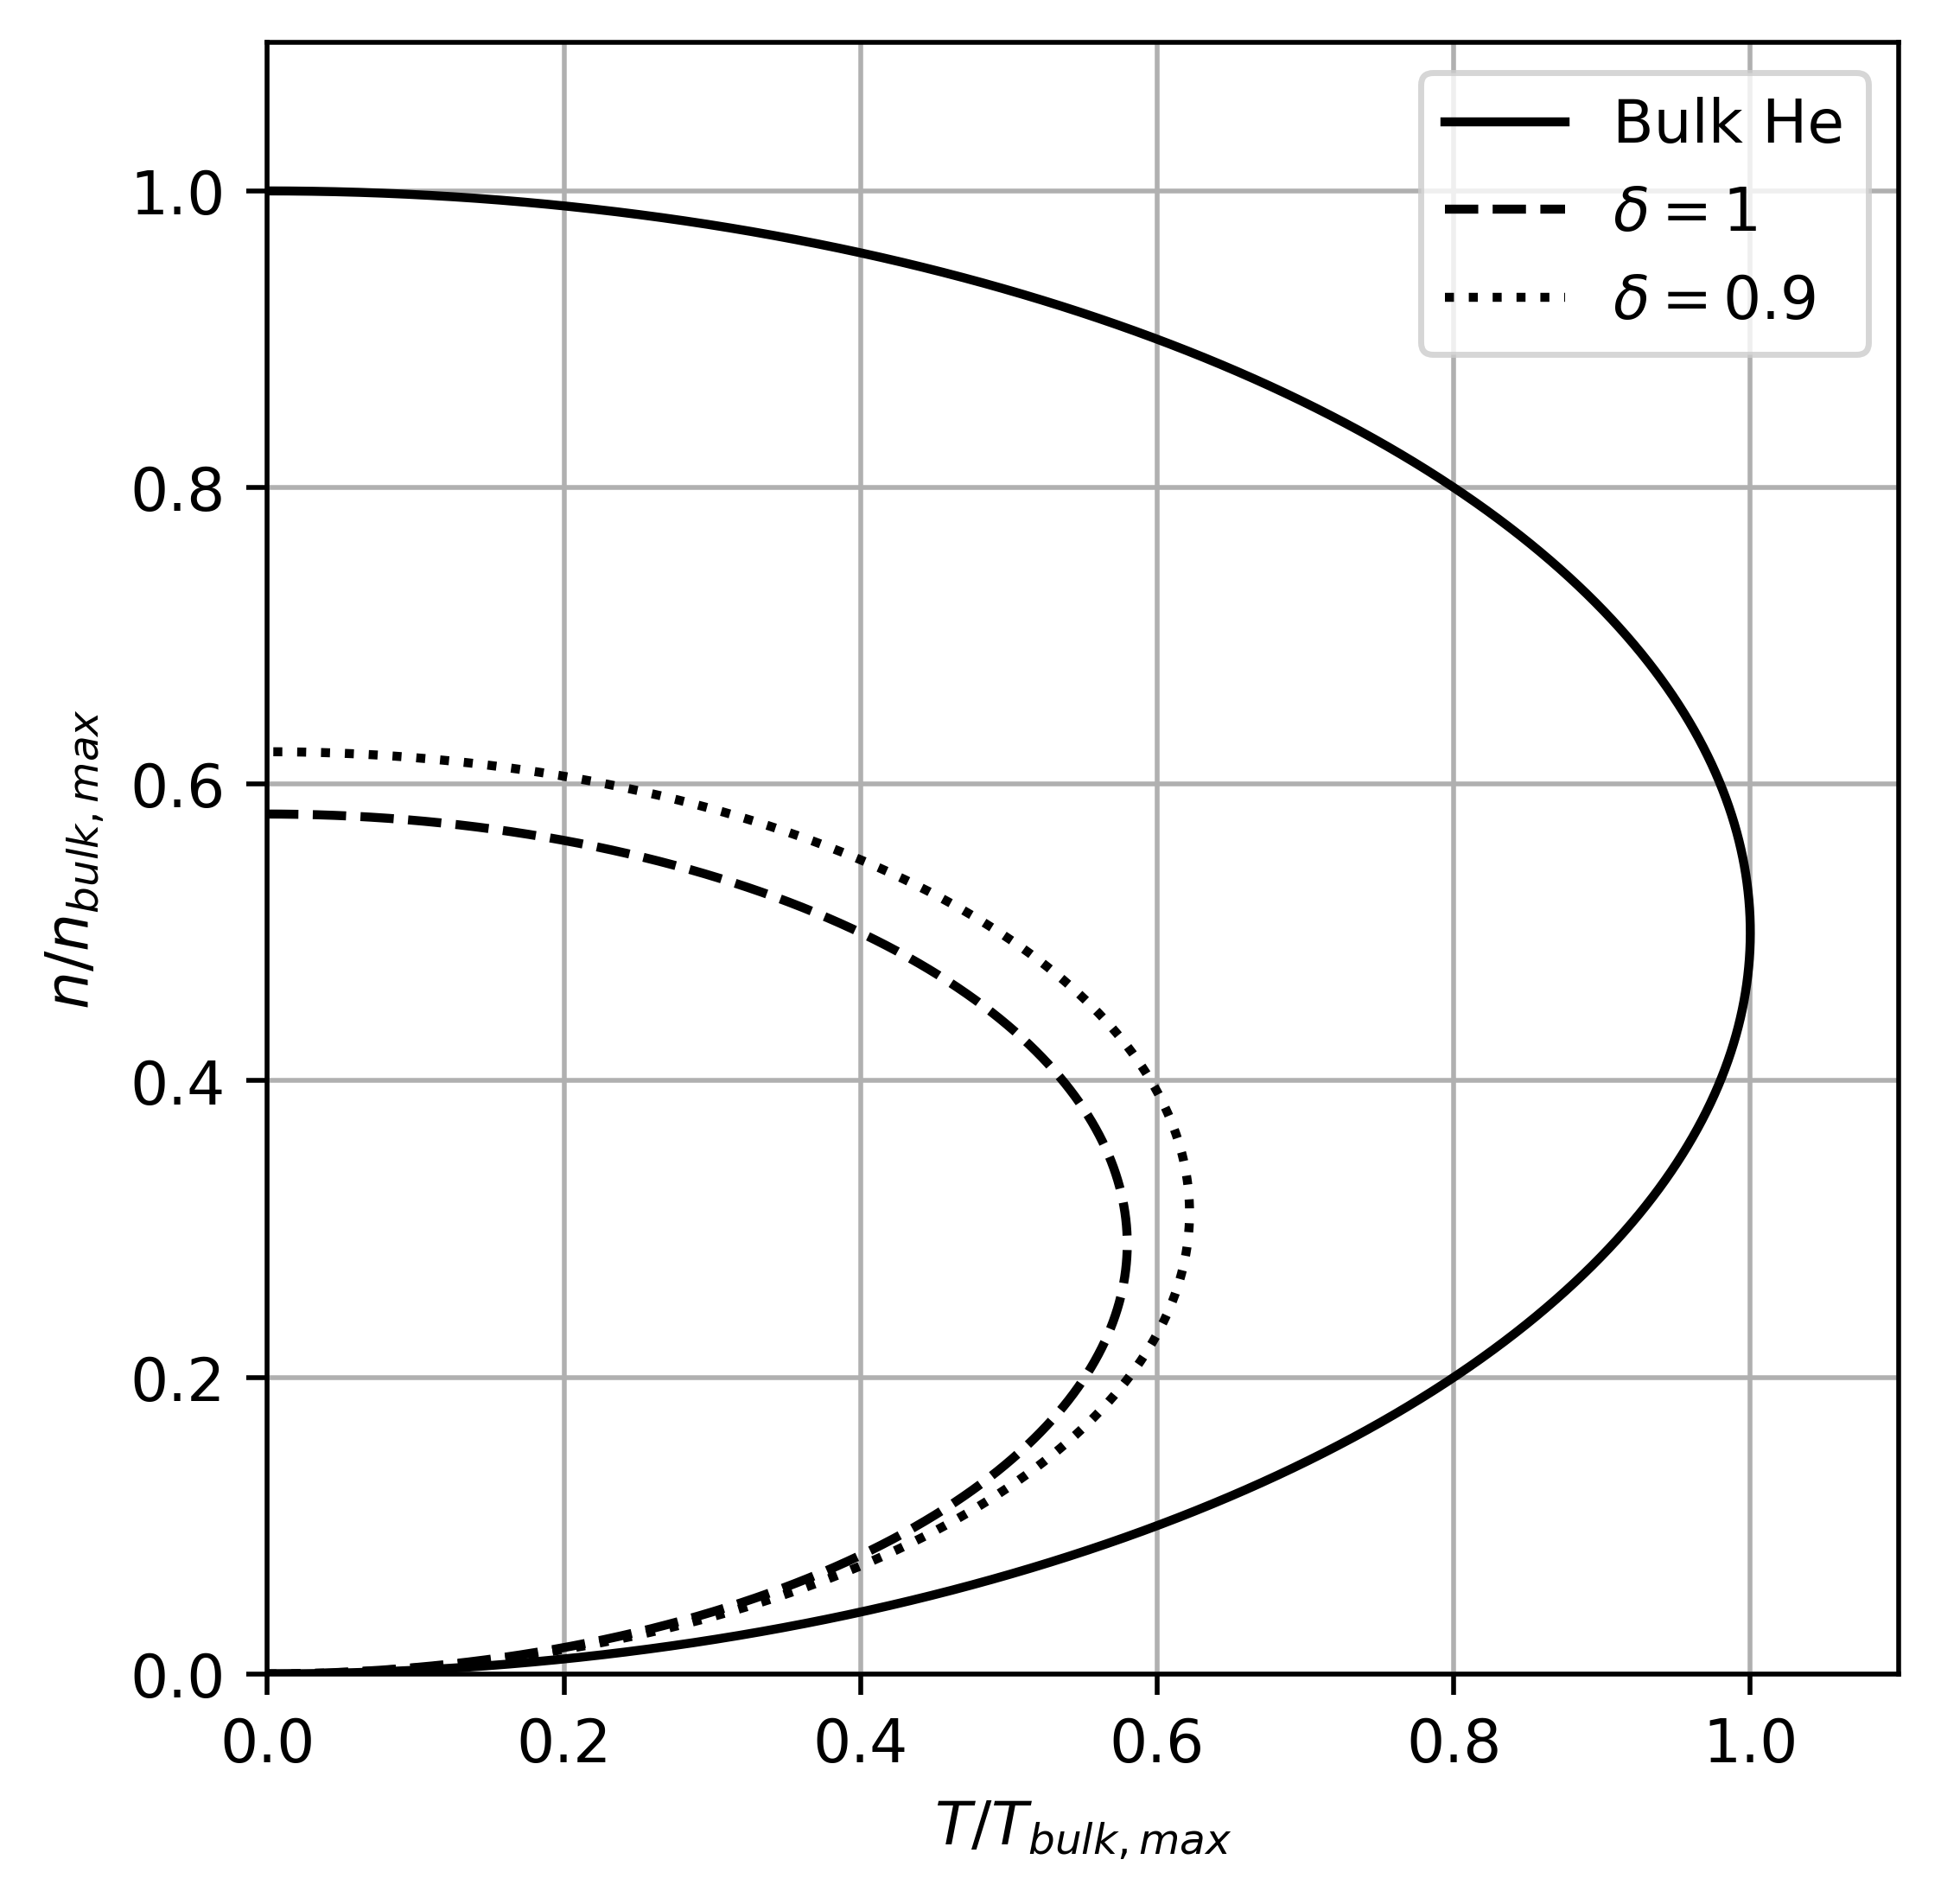

In [35]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
ax.set_aspect(1)

ax.plot(Tb/Tc, nb/nc, color = 'k', linestyle = 'solid', label = "Bulk He")
ax.plot(T1/Tc, n1/nc, color = 'k', linestyle = 'dashed', label = r"$\delta = 1$")
ax.plot(T2/Tc, n2/nc, color = 'k', linestyle = 'dotted', label = r"$\delta = 0.9$")
ax.set_ylim(0, 1.1)
ax.set_xlim(0, 1.1)
ax.grid()
ax.legend()
ax.set_xlabel(r'$T/T_{bulk,max}$')
ax.set_ylabel(r'$n/n_{bulk,max}$')
plt.savefig("phaseDiagram.png")
plt.show()